### Treść zadania

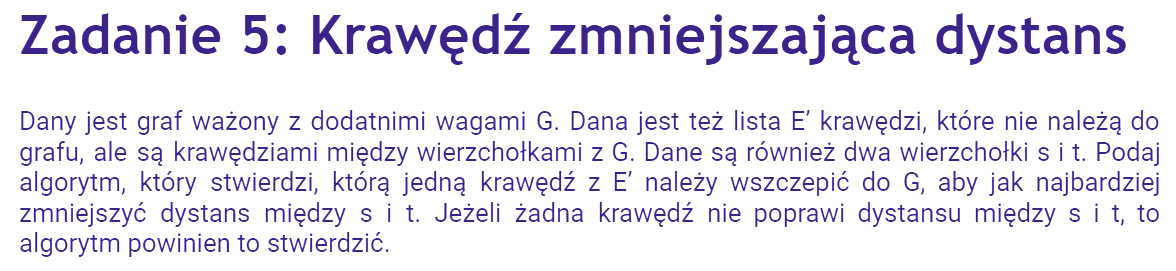

### Omówienie algorytmu

# Sposób I
### (Gorszy - Floyd-Warshall)

### Omówienie

Ten sposób jest bardzo dobrym sposobem dla grafów, w których mogą pojawić się ujemne wagi krawędzi. Tu mamy powiedziane, że wagi krawędzi w grafie są dodatnie, a w takiej sytuacji prawie zawsze jedynym rozsądnym algorytmem, który znajduje najkrósze ścieżki, jest algorytm Dijkstry (patrz Sposób II niżej).
<br><br>
W przypadku tej implementacji wykorzystujemy algorytm Floyda-Warshalla do wyznaczenia wszystkich najkrótszych ścieżek między każdą parą wierzchołków w grafie. Następnie w pętli przechodzimy po liście krawędzi $ E' $ i sprawdzamy, czy dołożenie tej krawędzi skraca długość najkrótszej ścieżki w grafie między wskazaną na wejściu parą wierzchołków. Wystarczy zauważyć, że dodana krawędź skróci długość najkrótszej ścieżki jedynie wtedy, gdy nowa najkrótsza ścieżka będzie zawierała tę krawędź. Aby sprawdzić długość najkrótszej ścieżki, która przechodzi przez dodaną krawędź, wystarczy wówczas sprawdzić, czy zachodzi poniższy warunek:

    min(dist[s][u] + dist[v][t], dist[s][v] + dist[u][t]) + weight < min_dist

Sprawdzamy obie możliwe orientacje krawędzi na ścieżce, tj. w kierunku z $ u $ do $ v $ i z $ v $ do $ u $, ponieważ nie wiemy, w którą stronę należy przejść przez tę krawędź. Jeżeli taki warunek będzie spełniony, oznacza to, że znaleźliśmy nową ścieżkę, która jest krótsza od poprzedniej najkrótszej (jej długość była zapisana w zmiennej $ min\_dist $). Ścieżka taka powstaje poprez znalezienie najkrótszej ścieżki z wierzchołka startowego $ s $ do jednego z końców krawędzi oraz znalezienie najkrótszej ścieżki z drugiego z końców krawędzi do wierzchołka docelowego $ t $. Jeżeli sumaryczna długość tych dwóch ścieżek, powiększona o wagę krawędzi, jest mniejsza niż długość poprzeniej najkrótszej ścieżki, aktualizujemy długość najkrótszej ścieżki.

###### UWAGA
Poniższa implementacja zakłada możliwość pojawienia się krawędzi o ujemnych wagach, zatem sprawdzane jest istnienie ujemnych cykli.

### Złożoność

###### Obliczeniowa:
$ O(V^3 + E') $
###### Pamięciowa:
$ O(V^2) $

### Implementacja

In [1]:
def floyd_warshall(G: 'graph represented by adjacency matrix'):
    n = len(G)
    inf = float('inf')
    
    W = [[inf] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if G[i][j] < inf:
                W[i][j] = G[i][j]
            elif i == j:
                W[i][j] = 0
    
    for t in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][t] + W[t][j] < W[i][j]:
                    W[i][j] = W[i][t] + W[t][j]
                    
    # Detect negative cycles (the same approach as in the
    # Bellman-Ford's algoritm)
    for t in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][t] + W[t][j] < W[i][j]:
                    W[i][j] = -inf
                
    return W


def best_edge(G: 'graph represented by adjacency matrix', 
              E: 'array of edges to check',
              s: 'start vertex',
              t: 'target vertex'):
    inf = float('inf')
    dist = floyd_warshall(G)
    min_dist = dist[s][t]
    
    # Check if there is a negative cycle on a path from s to t
    # (if such a cycle exists, there is no edge which can shorten
    # the lenght of the shortest path)
    if min_dist == -inf:
        return None
    
    # Check for each edge if it can shorten the length of the
    # shortest path and pick the one edge which shortens the
    # lenght of a path most
    res_edge = None
    for edge in E:
        u, v, weight = edge
        curr_dist = min(dist[s][u] + dist[v][t], dist[s][v] + dist[u][t]) + weight
        if curr_dist < min_dist:
            min_dist = curr_dist
            res_edge = edge
            
    return res_edge

###### Kilka testów

##### Pomocnicze

In [2]:
def undirected_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[float('inf')] * n for _ in range(n)]  # -1 means no edge
    for e in E:
        G[e[0]][e[1]] = e[2]
        G[e[1]][e[0]] = e[2]
    return G

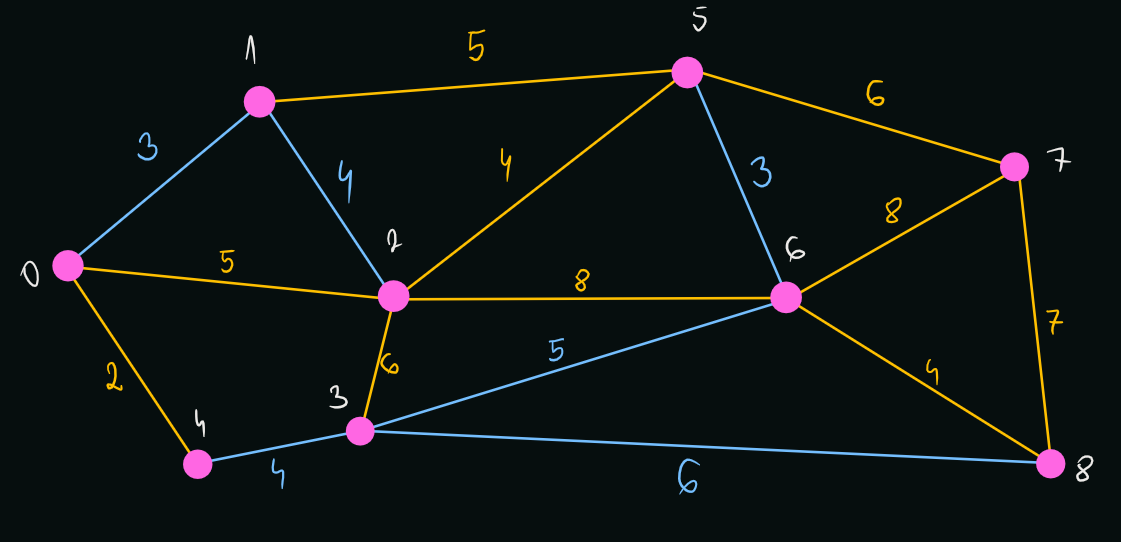

In [3]:
E  = [(0, 2, 5), (0, 4, 2), (2, 3, 6), (2, 5, 4), (1, 5, 5), (2, 6, 8), (5, 7, 6), (6, 7, 8), 
      (6, 8, 4), (7, 8, 7)]
E2 = [(0, 1, 3), (1, 2, 4), (4, 3, 4), (3, 6, 5), (3, 8, 6), (5, 6, 3)]

G = undirected_weighted_graph_matrix(E)

s = 0
t = 8
print(best_edge(G, E2, s, t))

(5, 6, 3)


In [4]:
s = 3
t = 8
print(best_edge(G, E2, s, t))

(3, 8, 6)


In [5]:
s = 4
t = 5
print(best_edge(G, E2, s, t))

(0, 1, 3)


In [6]:
s = 0
t = 2
print(best_edge(G, E2, s, t))

None


# Sposób II
### (Lepszy - Dijkstra)

### Omówienie algorytmu

Tworzymy taki ciekawy graf, w którym każdy wierzchołek ma 2 różnie listy sąsiedztwa. Na pierwszej z nich znajdują się krawędzie, które rzeczywiście należą do grafu $ G $, natomiast w drugiej liście znajdują się krawędzie, z których możemy wybrać krawędź zmniejszającą długość najkrótszej ścieżki w grafie pomiędzy wskazaną parą wierzchołków. Wówczas korzystamy ze zmodyfikowanej wersji algorytmu Dijkstry, w którym mamy 2 możliwości. Albo wybieramy krawędź spośród tych, które rzeczywiście należą do grafu - to możemy zrobić zawsze, albo wybieramy krawędź z listy krawędzi, z których możemy dodać jedną krawędź do grafu - to robimy tylko wtedy, gdy zdjęty z kolejki priorytetowej wierzchołek nie ma na najkrótszej ścieżce krawędzi, która nie należy do grafu. Konieczne jest zawsze dodanie najpierw krawędzi rzeczywistych, a dopiero później krawędzi ze zbioru $ E' $ do kolejki tak, aby w przypadku krawędzi o tych samych wagach (ogólnie ścieżek o tych samych wagach), najpierw zdjęta z kolejki została ta ścieżka, która nie zawiera krawędzi ze zbioru $ E' $ (ponieważ w przypadku, gdy istnieje kilka ścieżek o tej samek sumarycznej wadze, zawsze rozwiązaniem jest ta, w której nie wzięliśmy żadnej krawędzi ze zbioru $ E' $, dlatego że wówczas, po wzięciu jakiejś krawędzi z tego zbioru, nie zmniejszylibyśmy długości najkrótszej ścieżki (oczywiście o ile istnieje najkrótsza ścieżka bez dobieranych krawędzi)).

### Złożoność

###### Obliczeniowa:
$ O((E + E') \cdot log(V)) $
###### Pamięciowa:
$ O(V + E + E') $ - bo tworzymy graf w reprezentacji listowej

### Implementacja

In [7]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    weights = [[inf] * 2 for _ in range(n)]
    taken_edges = [None] * n
    pq = PriorityQueue()
    pq.put((0, s, None))

    while not pq.empty():
        min_w, u, taken_edge = pq.get()
        # If we found the shortest path to the u vertex, we will update
        # its weight in a weights array, considering whether there was
        # an edge from E' set taken or not
        if min_w < weights[u][bool(taken_edge)]:
            if taken_edge:
                weights[u][1] = min_w
                taken_edges[u] = taken_edge
            else:
                weights[u][0] = min_w
            # Break a loop if we found a shortest path to the specified
            # target
            if u == t: break
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u][0]:
                pq.put((min_w + weight, v, taken_edge))
            # Add edges which are not in a graph only if there is no previous
            # taken edge
            if not taken_edge:
                for v, weight in G[u][1]:
                    pq.put((min_w + weight, v, (u, v, weight)))
                
    return taken_edges


def create_graph(E: 'array of edges in a graph', E2: 'array of edges which can be added to a graph'):
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    
    G = [[[] for _ in range(2)] for _ in range(n)]
    for e in E:
        G[e[0]][0].append((e[1], e[2]))
        G[e[1]][0].append((e[0], e[2]))
    for e in E2:
        G[e[0]][1].append((e[1], e[2]))
        G[e[1]][1].append((e[0], e[2]))
        
    return G


def best_edge(E: 'array of edges in a graph', 
              E2: 'array of edges to check',
              s: 'start vertex',
              t: 'target vertex'):
    G = create_graph(E, E2)
    taken_edges = dijkstra(G, s, t)
    return taken_edges[t]

###### Kilka testów

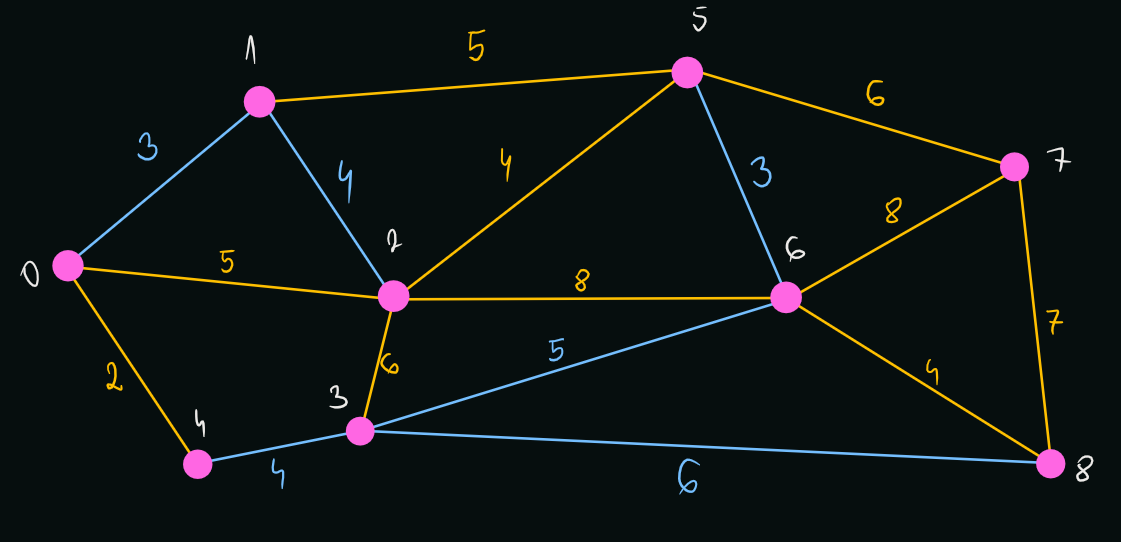

In [8]:
E  = [(0, 2, 5), (0, 4, 2), (2, 3, 6), (2, 5, 4), (1, 5, 5), (2, 6, 8), (5, 7, 6), (6, 7, 8), 
      (6, 8, 4), (7, 8, 7)]
E2 = [(0, 1, 3), (1, 2, 4), (4, 3, 4), (3, 6, 5), (3, 8, 6), (5, 6, 3)]

s = 0
t = 8
print(best_edge(E, E2, s, t))

(5, 6, 3)


In [9]:
s = 3
t = 8
print(best_edge(E, E2, s, t))

(3, 8, 6)


In [10]:
s = 4
t = 5
print(best_edge(E, E2, s, t))

(0, 1, 3)


In [11]:
s = 0
t = 2
print(best_edge(E, E2, s, t))

None
